In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
df_pse = pd.read_parquet('data/2023/processed_PSE_BPKD.parquet')
df_pogoda = pd.read_parquet('data/2023/processed_weather.parquet')
df_ceny_rdn = pd.read_parquet('data/2023/processed_rce.parquet')
df_profile = pd.read_parquet('data/2023/processed_standardowe_profile_enea.parquet')

## 1.Stworzenie danych odzwierciadlających zachowania gospodarstw domowych na rynku energii elektrycznej


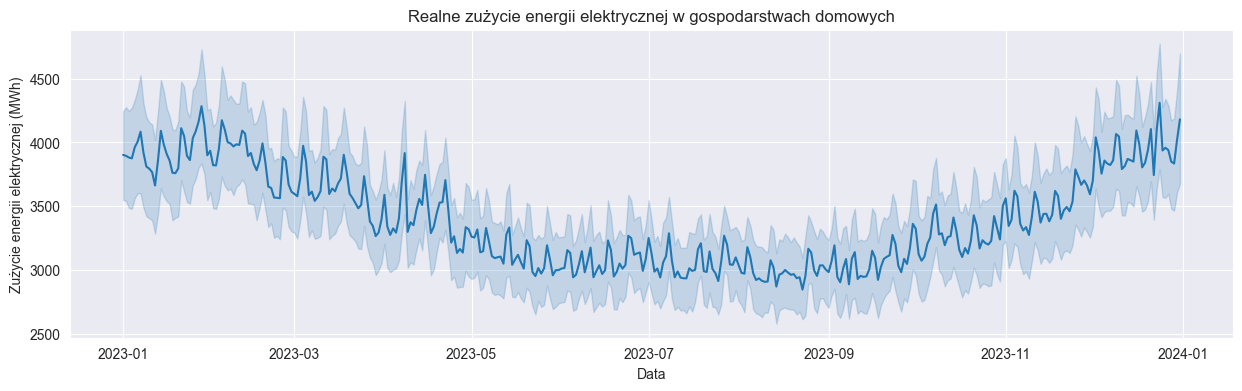

In [3]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_profile, x='Data', y='Godzinowe zużycie gd MWh')
plt.xlabel('Data')
plt.ylabel('Zużycie energii elektrycznej (MWh)')
plt.title('Realne zużycie energii elektrycznej w gospodarstwach domowych')

plt.show()

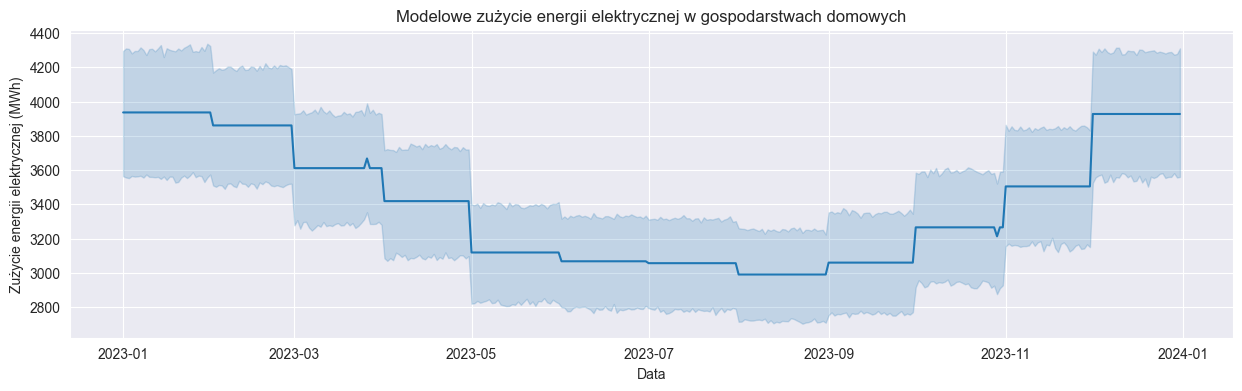

In [4]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_profile, x='Data', y='Modelowe godzinowe zużycie gd MWh')
plt.xlabel('Data')
plt.ylabel('Zużycie energii elektrycznej (MWh)')
plt.title('Modelowe zużycie energii elektrycznej w gospodarstwach domowych')

plt.show()

In [5]:
# plt.figure(figsize=(15,6))
# sns.lineplot(data=df_profile, x='Data', y='Modelowe godzinowe zużycie gd MWh', hue='Godzina', palette='coolwarm')
# plt.xlabel('Data')
# plt.ylabel('Zużycie energii elektrycznej (MWh)')
# plt.title('Modelowe zużycie energii elektrycznej w gospodarstwach domowych')
# 
# plt.show()

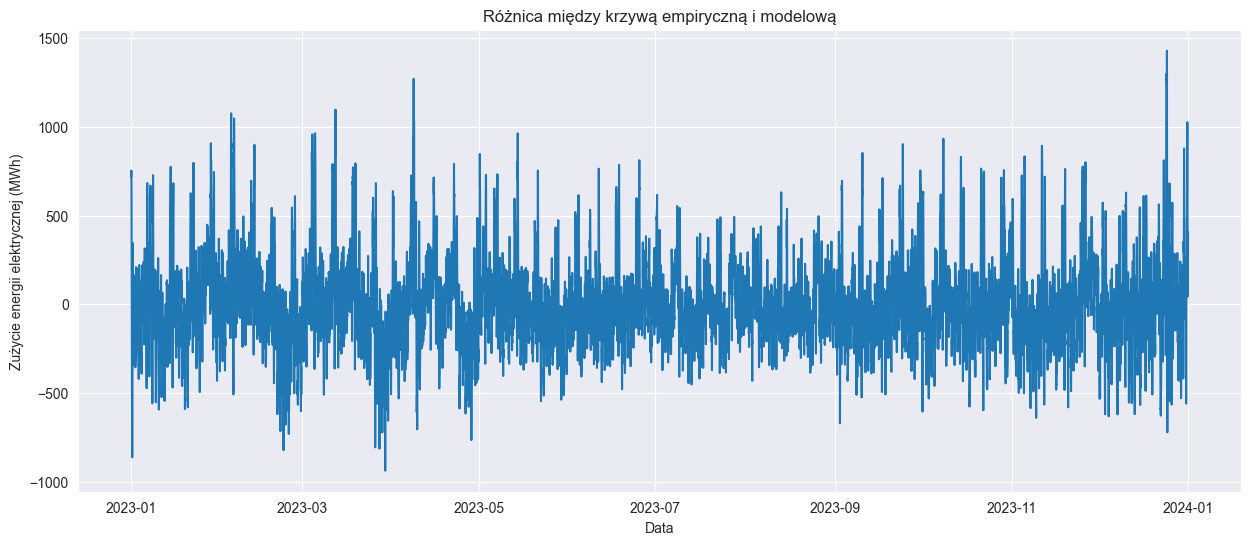

In [6]:

# df_profile = df_profile[df_profile['Data'] >= datetime.date(2023,12,20)]
plt.figure(figsize=(15,6))
plt.plot(df_profile['Data Godzina'], df_profile['Delta godzinowe zużycie gd MWh'])
plt.xlabel('Data')
plt.ylabel('Zużycie energii elektrycznej (MWh)')
plt.title('Różnica między krzywą empiryczną i modelową')
plt.show()

## Ceny

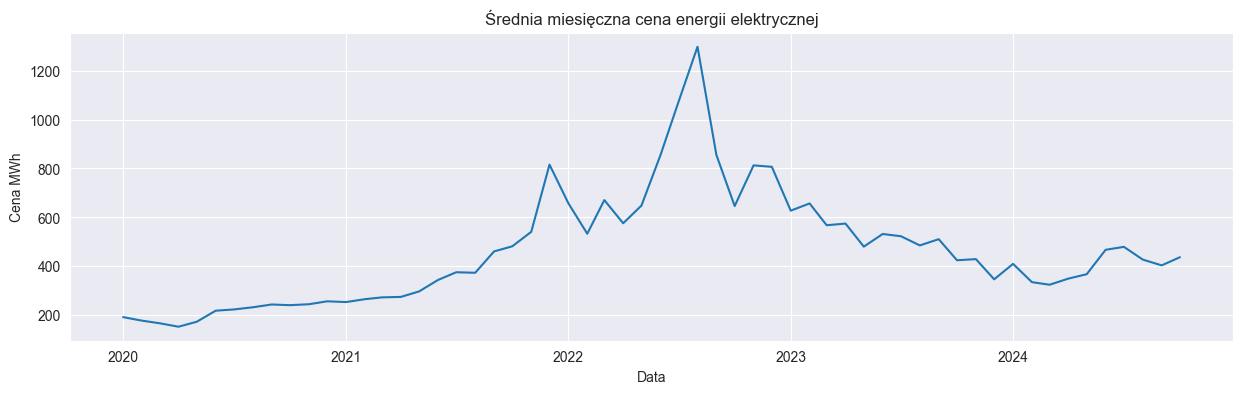

In [7]:
df_ceny_rdn_hist = pd.read_parquet('data/obrobione_Ceny_2020_24.parquet')
df_ceny_rdn_hist['Miesiąc'] = df_ceny_rdn_hist['Data Godzina'].dt.month
df_ceny_rdn_hist['Rok'] = df_ceny_rdn_hist['Data Godzina'].dt.year
df_ceny_rdn_hist = df_ceny_rdn_hist.groupby(['Miesiąc', 'Rok']).agg({
    'Cena PLN/MWh': 'mean',
    'Data Godzina': 'min'
})

plt.figure(figsize=(15,4))
sns.lineplot(x=df_ceny_rdn_hist['Data Godzina'], y=df_ceny_rdn_hist['Cena PLN/MWh'])
plt.xlabel('Data')
plt.ylabel('Cena MWh')
plt.title('Średnia miesięczna cena energii elektrycznej')
plt.show()

## Połączenie danych

In [8]:
df_profile = df_profile[['Data Godzina', 'Delta godzinowe zużycie gd MWh', 'Godzinowe zużycie gd MWh']].copy()
df = pd.merge(df_profile, df_pse, on='Data Godzina')
df = pd.merge(df, df_ceny_rdn, on='Data Godzina')
df = pd.merge(df, df_pogoda, on='Data Godzina')

In [9]:
import holidays
polish_holidays = holidays.Poland(years=2023)
df['Święto'] = 0
df.loc[df['Data Godzina'].dt.date.isin(polish_holidays.keys()), 'Święto'] = 1

df['Dzień tygodnia'] = df['Data Godzina'].dt.weekday
df['Godzina'] = df['Data Godzina'].dt.hour
df['Miesiąc'] = df['Data Godzina'].dt.month

In [10]:
df.to_parquet('data/2023/for_ml_model.parquet')